# 计算物理第五次作业

## 1.一阶对流方程

+ 用以下程序进行计算：

F:\phython\install\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


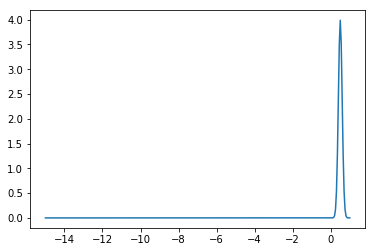

In [3]:
from math import *
from numpy import *
import matplotlib.pyplot as plt
from pandas import *
from random import *
from time import *
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from matplotlib import animation
import sys
a = -1#定义a的值
t_start = 0#定义t、x初值和末值
t_end = 10
x_start = -15
x_end = 1
dt = 0.04#定义dt、dx
dx = 0.05
r = dt*a/dx
def Square_wave(x):#定义方波
    square_start = 0
    square_end = 0.5
    if square_start < x < square_end:
        return 1
    else:
        return 0
def Square_wave_vector(x_vec):#定义方波初条件
    wave_vec = array([0.0]*len(x_vec))
    i = 0
    while i <= len(x_vec)-1:
        wave_vec[i] = Square_wave(x_vec[i])
        i += 1
    return wave_vec
def Gauss_wave(x):#定义高斯波初条件
    mu = 0.5
    sigma2 = 0.1
    return stats.norm.pdf(x,mu,sigma2)
initial_function = Gauss_wave#定义初始条件，可以改为方波或高斯波
if abs((t_end-t_start)/dt-round((t_end-t_start)/dt)) < 0.1:#计算x、t的点数
    t_number = round((t_end-t_start)/dt)
else:
    t_number = int((t_end-t_start)/dt)+1
t_data = array(t_start+arange(t_number+1)*dt)
t_data[t_number] = t_end
if abs((x_end-x_start)/dx-round((x_end-x_start)/dx)) < 0.1:
    x_number = round((x_end-x_start)/dx)
else:
    x_number = int((x_end-x_start)/dx)+1
x_data = array(x_start+arange(x_number+1)*dx)
x_data[x_number] = x_end
u_data = array([[0.0]*(x_number+1)]*(t_number+1))
u_data[0] = initial_function(x_data)
it = 1
while it <= t_number:#差分法计算
    if a > 0:
        ix = 0
        u_data[it,0] = 0
        while ix <= x_number:
            u_data[it,ix] = u_data[it-1,ix]-r*(u_data[it-1,ix]-u_data[it-1,ix-1])
            ix += 1
    elif a < 0:
        ix = x_number-1
        u_data[it,x_number] = 0
        while ix >= 0:
            u_data[it,ix] = u_data[it-1,ix]-r*(u_data[it-1,ix+1]-u_data[it-1,ix])
            ix -= 1
    it += 1
fig = plt.figure()
window = fig.add_subplot(111)  
line, = window.plot(x_data,u_data[0])
def update(data):  
    line.set_ydata(data)  
    return line,
ani = animation.FuncAnimation(fig,update,u_data,interval=50)  
ani.save(r'./Fig1_Gauss_cond1.html')#保存路径
ani.save(r'./Fig1_Gauss_cond1.htm')

+ 目前程序为$a=-1$，$dt=0.04,dx=0.05$，初条件为高斯波的运行结果。根据计算结果作出的动态图像将会保存在'1500011413+谷平凡+作业5.ipynb'文件的相同目录下（一般为/user中），共三个文件：Fig1_Gauss_cond1_frames保存每一帧的图片，Fig1_Gauss_cond1.html和Fig2_Gauss_cond1.htm保存动态图像，可以通过上面程序的最后一行修改路径,可以通过11~17行修改$a$、$dt$、$dx$等参数以及$x$和$t$的范围，可以通过第18~35行修改高斯波和方波的参数，可以通过第36行修改初始条件。
+ 附件中picture/Fig1文件夹分别存有初始条件为高斯波和方波，在$dt=0.04,dx=0.05$、$dt=0.05,dx=0.05$和$dt=0.06,dx=0.05$三种条件下的运行结果，文件名分别定义为“Fig1\_初条件函数\_差分步长条件”。从运行结果可以看到，对于初条件为高斯波的情况，当$dt=0.04,dx=0.05$时(cond1)，满足稳定性条件$\Delta{t}\lt\frac{\Delta{x}}{|a|}$，因此高斯波的行为很稳定，在从右向左传递的过程中逐渐衰减、变宽；而同样差分步长下的方波则会很快地变为高斯波，然后同样向左传播并衰减变宽。当$dt=0.06,dx=0.05$时(cond2)，$A=\frac{u^{n+1}}{u^n}=1-r[1-\cos(\Delta{x})]-ir\sin(\Delta{x})\equiv 1$，因此高斯波和方波都不会衰减，而是保持最初的形态向右传播。而当$dt=0.06,dx=0.05$时(cond3)，$\Delta{t}\gt\frac{\Delta{x}}{|a|}$，即$A=\frac{u^{n+1}}{u^n}\gt 1$，稳定性条件不再满足，因此高斯波和方波都会很快发散。
+ 另外，在$x$的右边界，我的处理是令函数值恒为0。另一种做法是用左边一点的对$x$的偏微分的值来表示右边界点对$x$的偏微分，这样做对波的行为没有影响，但对于高斯波而言，由于其有一定的展宽，因此在右边界处仍有一定的梯度，这样做运行下去会使波包经过的区域下凹，与真实情况不符，因此我认为右边界处即为无限远，将始终赋值为0.

## 2.Kruskal,Zalusky孤立子

+ 对于方程$\frac{\partial{u(x,t)}}{\partial{t}}+u(x,t)\frac{\partial{u(x,t)}}{\partial{x}}+\delta^2\frac{\partial^3{u(x,t)}}{\partial{t}^3}=0$，采用差分$\frac{\partial{u(x,t)}}{\partial{t}}=\frac{u_{i,j}-u_{i-1,j}}{\Delta{t}}$，$\frac{\partial{u(x,t)}}{\partial{x}}=\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta{x}}$，$u(x,t)=\frac{u_{i,j-1}+2u_{i,j}+u_{i,j+1}}{4}$，有：
$$
u_{i,j}=u_{i-1,j-1}-\frac{1}{8}\frac{\Delta{t}}{\Delta{x}}(u_{i-1,j-1}+2u_{i,j}+u_{i-1,j+1})(u_{i-1,j+1}-u_{i-1,j-1})-\delta^2\frac{\Delta{t}}{2\Delta{x}^3}(u_{i-1,j+2}+2u_{i-1,j-1}-2u_{i-1,j+1}-u_{i-1,j-2})
$$
+ 用下列程序进行计算:

In [97]:
delta = 0.022#定义delta的值
t_start = 0#t、x的初始值
x_start = 0
t_number = 1600000#t、x的步数
x_number = 160
dx = 1/80.0#t、x的步长
dt = 1/100000
def initial_condition(x_vec):#定义初始函数
    initial_vec = array([0.0]*len(x_vec))
    i = 0
    while i <= len(x_vec)-1:
        initial_vec[i] = cos(pi*x_vec[i])
        i += 1
    return initial_vec
def smooth(u_vec):#数组平滑函数
    smooth_vec = copy(u_vec)
    i = 1
    while i <= len(u_vec)-2:
        smooth_vec[i] = 1/3*(u_vec[i-1]+u_vec[i]+u_vec[i+1])
        i += 1
    return smooth_vec
t_end = t_start+t_number*dt#计算t、x的终止值
x_end = x_start+x_number*dx
t_data = array(t_start+arange(t_number+1)*dt)#创建t、x和u的数组
x_data = array(x_start+arange(x_number+1)*dx)
u_data = array([[0.0]*(x_number+2)]*(t_number+1))
u_data[0,0:x_number+1] = initial_condition(x_data)#赋初始条件
u_data[0,x_number] = u_data[0,0]#周期性边界条件
u_data[0,x_number+1] = u_data[0,1]
i = 1
while i <= t_number:#差分法计算
    j = 2
    while j <= x_number-1:
        u_data[i,j] = u_data[i-1,j]-0.5*(1/4*dt/dx*(u_data[i-1,j-1]+2*u_data[i-1,j]+u_data[i-1,j+1])*(u_data[i-1,j+1]-u_data[i-1,j-1])+pow(delta,2)*dt/pow(dx,3)*(u_data[i-1,j+2]+2*u_data[i-1,j-1]-2*u_data[i-1,j+1]-u_data[i-1,j-2]))
        j += 1
    u_data[i,0] = u_data[i-1,0]-0.5*(1/4*dt/dx*(u_data[i-1,x_number-1]+2*u_data[i-1,0]+u_data[i-1,1])*(u_data[i-1,1]-u_data[i-1,x_number-1])+pow(delta,2)*dt/pow(dx,3)*(u_data[i-1,2]+2*u_data[i-1,x_number-1]-2*u_data[i-1,1]-u_data[i-1,x_number-2]))
    u_data[i,1] = u_data[i-1,1]-0.5*(1/4*dt/dx*(u_data[i-1,0]+2*u_data[i-1,1]+u_data[i-1,2])*(u_data[i-1,2]-u_data[i-1,0])+pow(delta,2)*dt/pow(dx,3)*(u_data[i-1,3]+2*u_data[i-1,0]-2*u_data[i-1,2]-u_data[i-1,x_number-1]))
    u_data[i,x_number] = u_data[i,0]
    u_data[i,x_number+1] = u_data[i,1]
    i += 1
print(u_data)#输出u的计算结果，提示程序已运行结束

[[ 1.          0.99922904  0.99691733 ...  0.99922904  1.
   0.99922904]
 [ 1.          0.99923026  0.99691978 ...  0.99922781  1.
   0.99923026]
 [ 1.          0.99923149  0.99692222 ...  0.99922658  1.
   0.99923149]
 ...
 [-0.85399102 -0.63076335 -0.97575628 ... -0.93493239 -0.85399102
  -0.63076335]
 [-0.85224341 -0.63142734 -0.97593534 ... -0.9364624  -0.85224341
  -0.63142734]
 [-0.85049338 -0.63209926 -0.97610791 ... -0.93798426 -0.85049338
  -0.63209926]]


+ 取$dx=\frac{1}{80}$，$dt=\frac{1}{100000}$时，该程序可稳定地输出至$t=16s$左右的数值，随后变得不稳定并最终发散。特定点的输出图像如下图所示：

Text(0.5,1,'t=7/π(sec)')

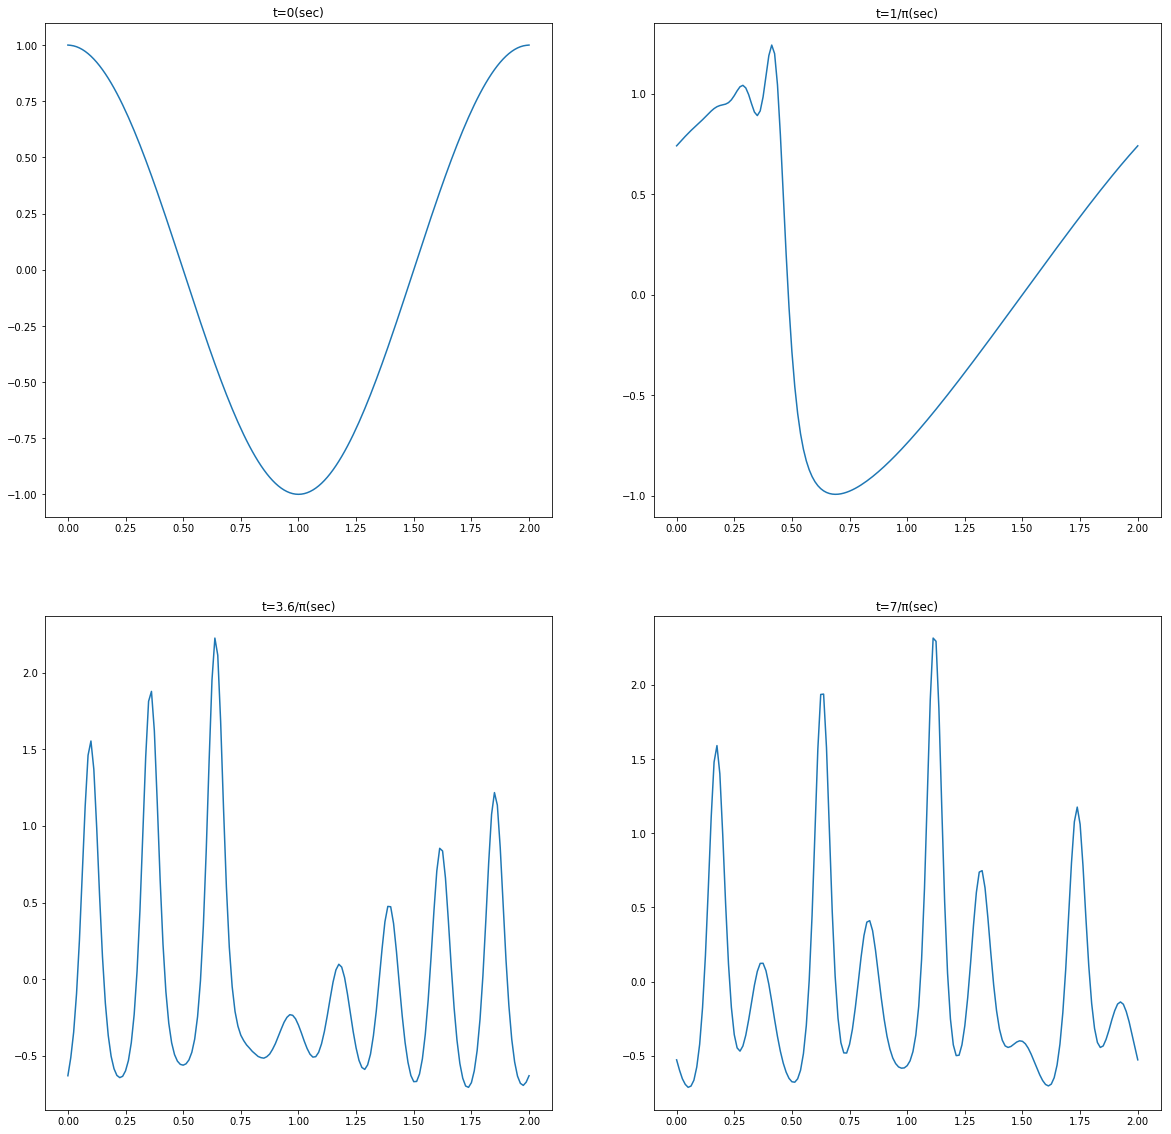

In [134]:
figure = plt.figure(figsize = (20,20))
plt.subplot(221)
plt.plot(x_data,smooth(u_data[0,0:x_number+1]))
plt.title('t=0(sec)')
plt.subplot(222)
plt.plot(x_data,smooth(u_data[31831,0:x_number+1]))
plt.title('t=1/π(sec)')
plt.subplot(223)
plt.plot(x_data,smooth(u_data[114592,0:x_number+1]))
plt.title('t=3.6/π(sec)')
plt.subplot(224)
plt.plot(x_data,smooth(u_data[222816,0:x_number+1]))
plt.title('t=7/π(sec)')

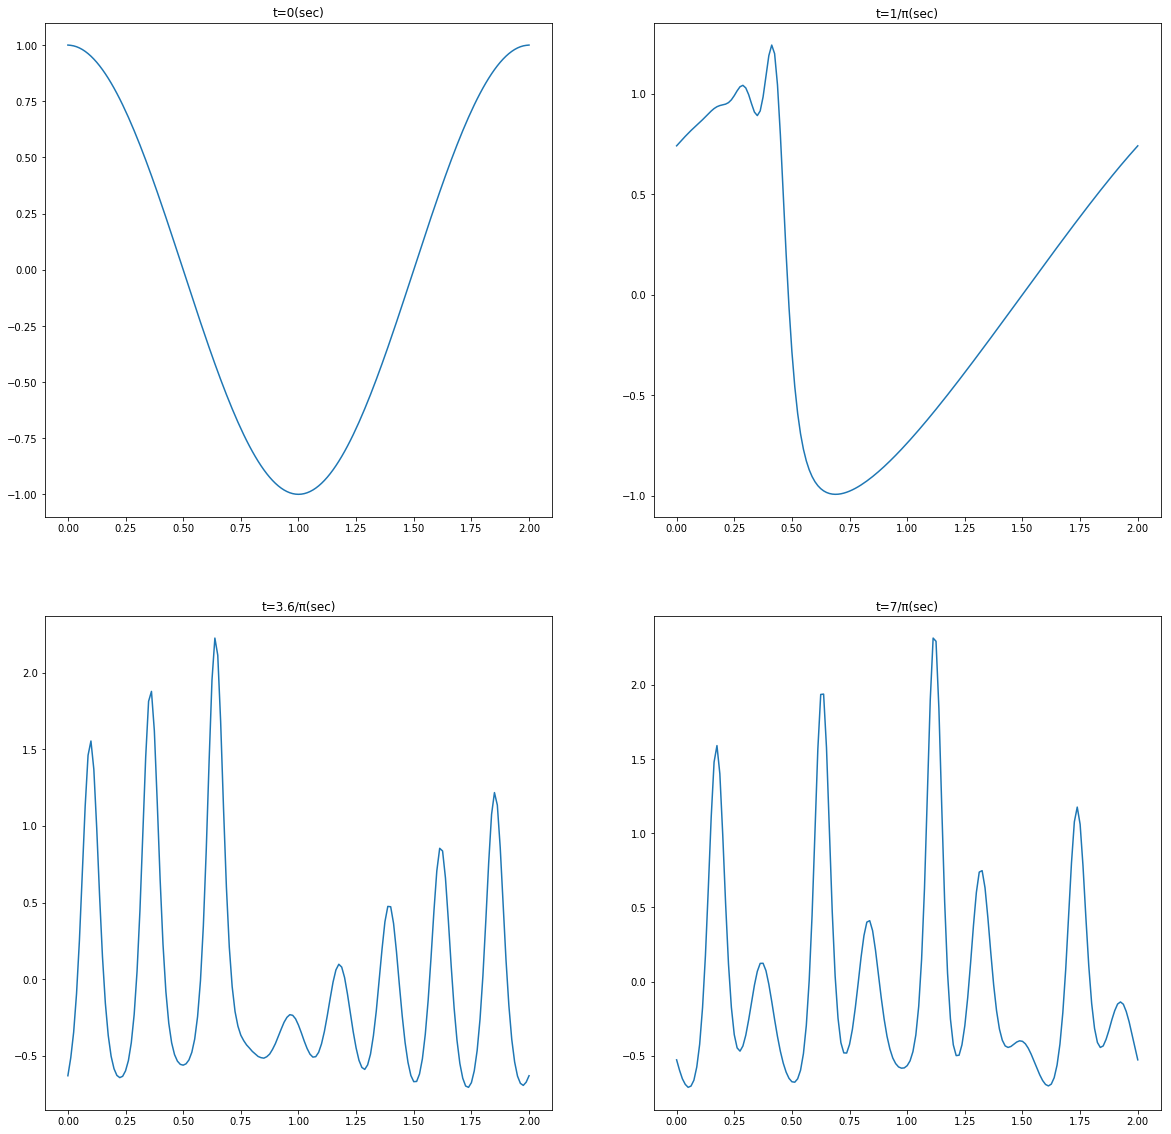

/Users/Plough/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Plough/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


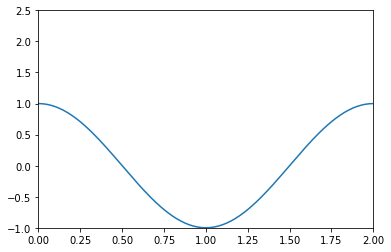

In [101]:
pic_frame = 5000#动图总帧数
pic_interval = int(t_number/pic_frame)#每一帧之间的间隔
u_pic = array([[0.0]*(x_number+2)]*(pic_frame+1))
i = 0
while i*(pic_interval) <= t_number:#得到作图矩阵
    u_pic[i] = copy(u_data[i*pic_interval])
    i += 1
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0,2])  
ax.set_ylim([-1,2.5])
window = fig.add_subplot(111)  
line, = window.plot(x_data,smooth(u_pic[0,0:x_number+1]))
def update(data):  
    line.set_ydata(smooth(data))#将曲线平滑后再作图  
    return line,
ani = animation.FuncAnimation(fig,update,u_pic[:,0:x_number+1],interval = 3)  
ani.save(r'./Fig2.html')#保存路径
ani.save(r'./Fig2.htm')

+ 根据计算结果作出的动态图像将会保存在'1500011413+谷平凡+作业5.ipynb'文件的相同目录下（一般为/user中），共三个文件：Fig2_frames保存每一帧的图片，Fig2.html和Fig2.htm保存动态图像，可以通过上面程序的最后一行修改路径。运行结果见附件中picture/Fig2文件夹。
+ 从附件中的动图可以看到，从开始到15s之间孤立子的行为都比较稳定，到16s左右开始不稳定。随着时间的演进,余弦波开始挤压且几乎产生截波。其后色散项$u_{xxx}$开始起作用，解变为一列由8个类sech函数组成的波,而在这过程中,速度快的波会追上慢的波。一段时间之后,原先的余弦波又出现了。